## Project Name: House Prices: Advanced Regression Techniques

The main aim of this project is to predict the house price based on various features 

Dataset to downloaded from the below link
    [Advanced House Price](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

## All the Lifecycle In A Data Science Projects
1. Data Analysis / Data Pre-Processing
2. Feature Engineering
3. Feature Selection
4. Model Building
5. Model Evaluation
6. Model Deployment

## 1. Data Analysis Phase
 Main aim is to understand more about the data and deep dive into the basic data analytics processes.
 #### In Data Analysis We will Analyze To Find out the below stuff
1. Checking for Missing Values
2. All The Numerical Variables
3. Distribution of the Numerical Variables
4. Categorical Variables
5. Cardinality of Categorical Variables
6. Outliers
7. Relationship between independent and dependent feature(SalePrice)



In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from glob import glob
import os

In [2]:
# Reading dataset
direc = os.chdir(r"C:\Users\chmr2001\OneDrive - Nielsen IQ\Mrityunjaya\Learning\Advanced_House_Price\Advanced-House-Price-Prediction")
filename = [file for file in glob('*.{}'.format('csv'))]
df = pd.concat([pd.read_csv(file) for file in filename if 'train' in file],ignore_index=True)
#pd.options.display.max_columns=100
pd.pandas.set_option('display.max_columns',None)

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print("Shape: ",df.shape)

Shape:  (1460, 81)


##### Missing Values

In [5]:
# Printing the percentage of nan values present in each features
#1. selecting the features where nan value is present and storing in a list
features_nan=[features for features in df.columns if df[features].isnull().sum()>1]
print('Number of features having NaN:',len(features_nan))
#2. printing features name with % missing value
for features in features_nan:
    print(features,":", np.round(df[features].isnull().mean()*100,2), '% missing values')

Number of features having NaN: 18
LotFrontage : 17.74 % missing values
Alley : 93.77 % missing values
MasVnrType : 0.55 % missing values
MasVnrArea : 0.55 % missing values
BsmtQual : 2.53 % missing values
BsmtCond : 2.53 % missing values
BsmtExposure : 2.6 % missing values
BsmtFinType1 : 2.53 % missing values
BsmtFinType2 : 2.6 % missing values
FireplaceQu : 47.26 % missing values
GarageType : 5.55 % missing values
GarageYrBlt : 5.55 % missing values
GarageFinish : 5.55 % missing values
GarageQual : 5.55 % missing values
GarageCond : 5.55 % missing values
PoolQC : 99.52 % missing values
Fence : 80.75 % missing values
MiscFeature : 96.3 % missing values


##### Finding relationship between missing values and sales price

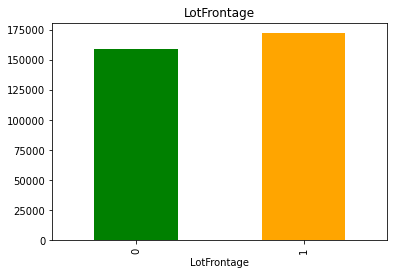

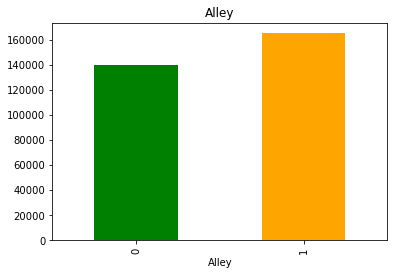

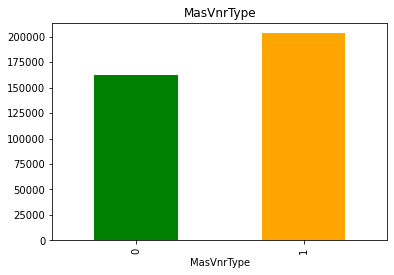

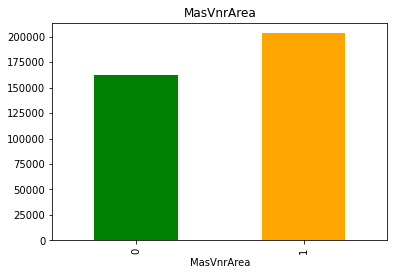

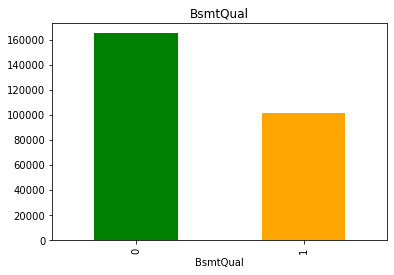

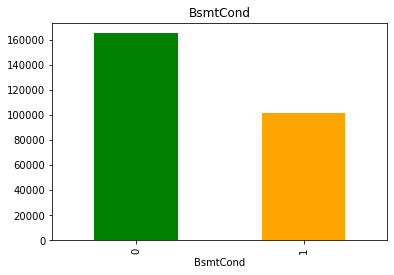

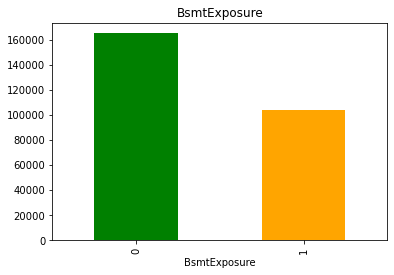

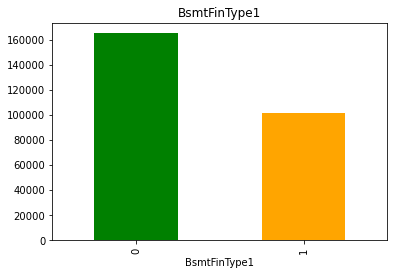

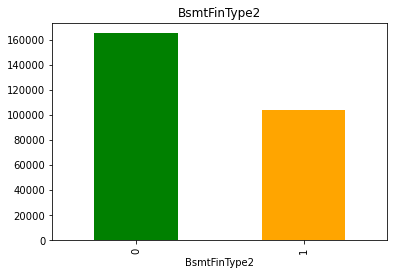

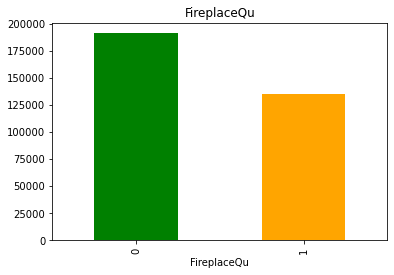

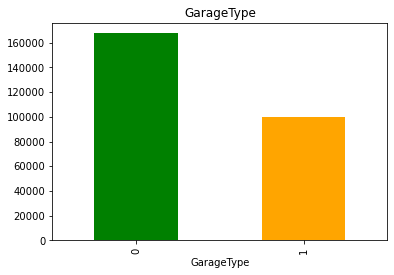

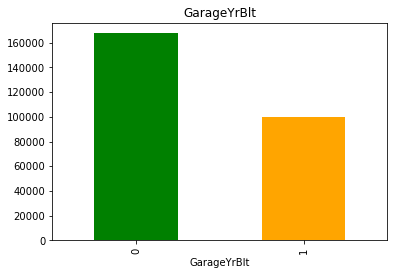

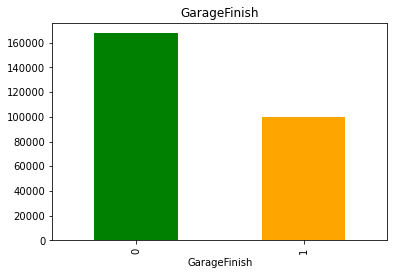

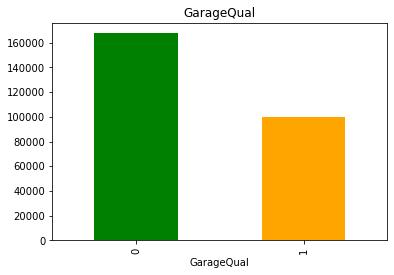

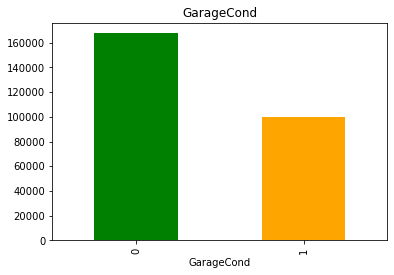

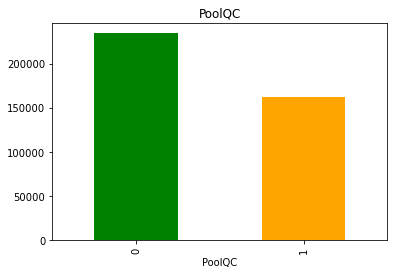

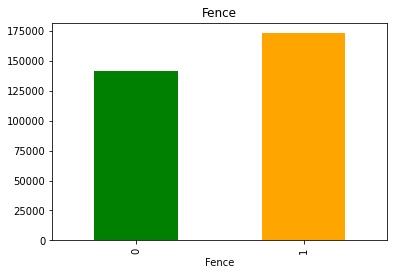

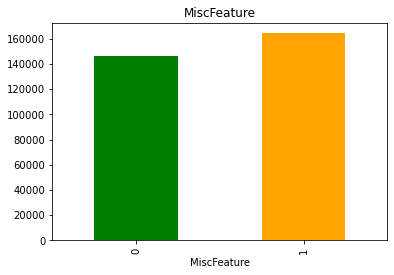

In [6]:
for feature in features_nan:
    df_copy = df.copy()
    # creating variable to flag NaN observation with 1 or 0
    df_copy[feature]=np.where(df_copy[feature].isnull(),1,0)
    df_copy.groupby(feature)['SalePrice'].median().plot.bar(color=['green','orange'])
    plt.title(feature)
    plt.show()

There is significant relationship between features having missing values with the target variable. Therefore we not delete the missing records.

In [7]:
# Finding Numerical Variables
numerical = [features for features in df.columns if df[features].dtypes !='object']
print("Number of Numerical variables:", len(numerical))
df[numerical].head()

Number of Numerical variables: 38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


#### Temporal Variables(Eg: Datetime Variables)


In [8]:
year_feature = [features for features in df.columns if 'Yr' in features or 'Year' in features]
df[year_feature].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


Text(0, 0.5, 'Sale Price Median')

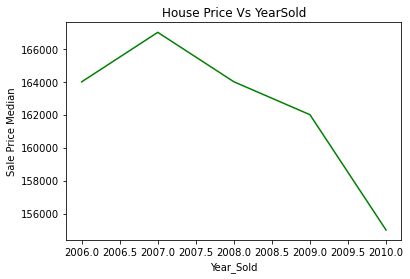

In [9]:
# Analyse SalePrice with Year of Sold
df.groupby('YrSold')['SalePrice'].median().plot(color='g')
plt.title('House Price Vs YearSold')
plt.xlabel('Year_Sold')
plt.ylabel('Sale Price Median')

- As age of the house increases the selling price of the comodities falls down because of deprecition.

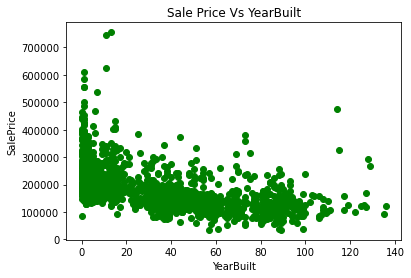

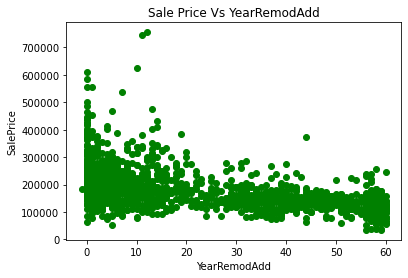

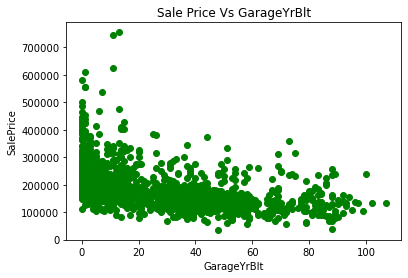

In [10]:
# Comapring all years with sale price
for feature in year_feature:
    if feature != 'YrSold':
        df_copy = df.copy()
        df_copy[feature]=df_copy['YrSold']-df[feature]
        plt.scatter(df_copy[feature],df['SalePrice'],color='green')
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.title('Sale Price Vs {}'.format(feature))
        plt.show()

- Sales price will decrease as the age of house/garage increases because of depreciation. 

In [11]:
# Numerical variable are of 2 types : Continuous & Discrete
discrete = [features for features in numerical if len(df[features].unique())<25 and features not in year_feature+['Id'] ]
print("# Discrete variables:",len(discrete))

# Discrete variables: 17


In [12]:
df[discrete].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


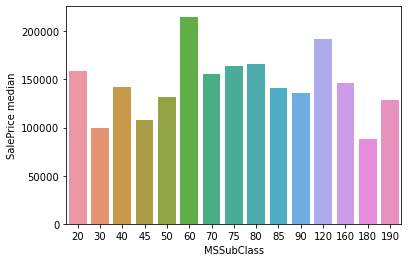

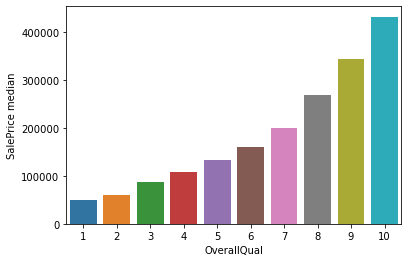

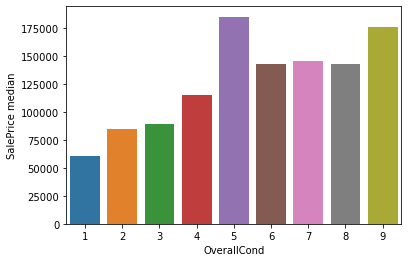

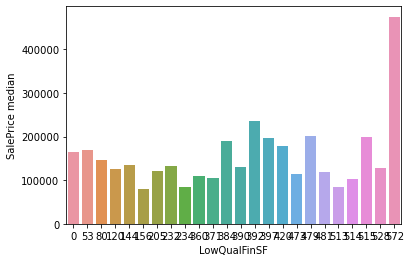

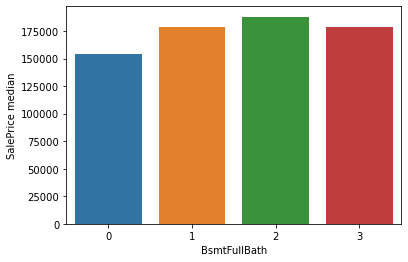

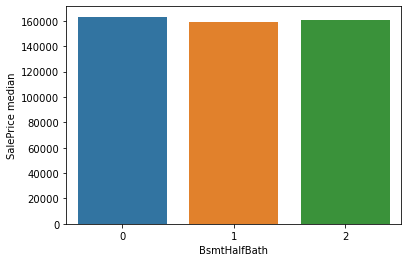

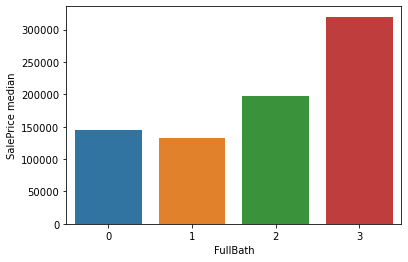

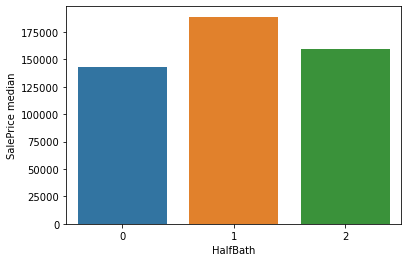

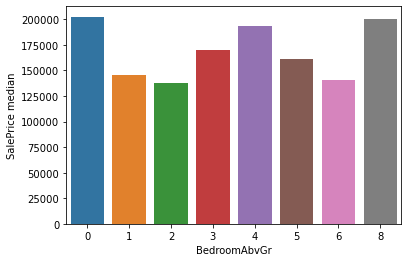

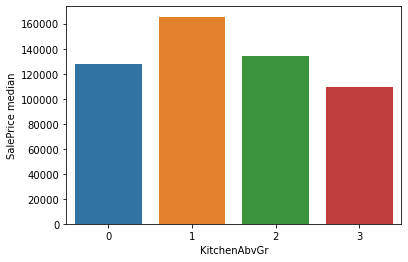

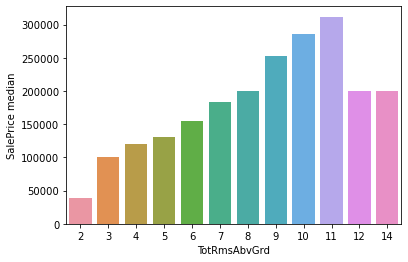

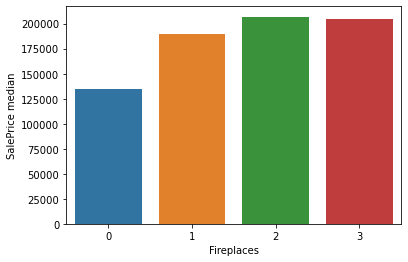

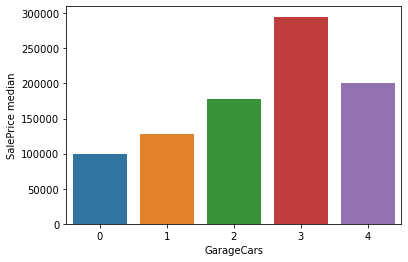

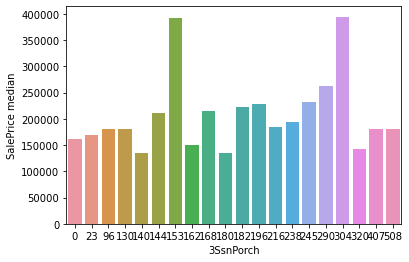

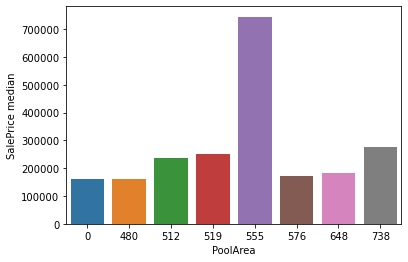

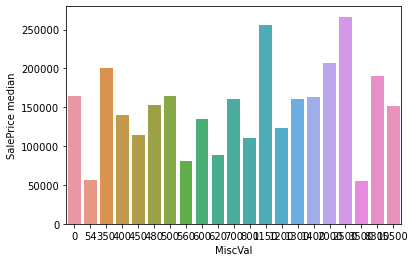

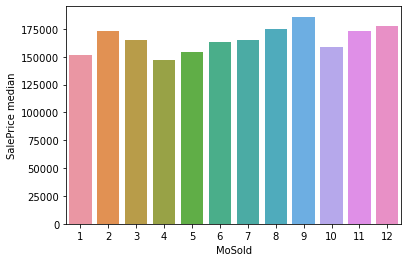

In [13]:
# finding relationship between discrete data and saleprice
from numpy import array
for feature in discrete:
    df_copy =df.copy()
    dis=df_copy.groupby(feature)['SalePrice'].median().reset_index()
    sns.barplot(x=dis[feature],y=dis['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice median')
    plt.show()
    

- In this dataset, we have 17 discete variable having a number of categories. From above graph it is clear that the sales price depends on the categories. Few of the discrete variables (like OverallQual, FullBath) has direct relationship with the sales price.

In [14]:
# continuous features
continuous = [features for features in numerical if features not in discrete+year_feature+['Id']]
print("# continuous features", len(continuous))

# continuous features 16


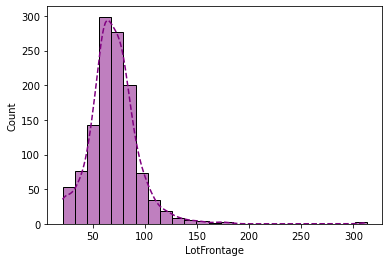

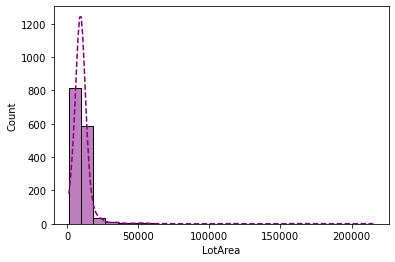

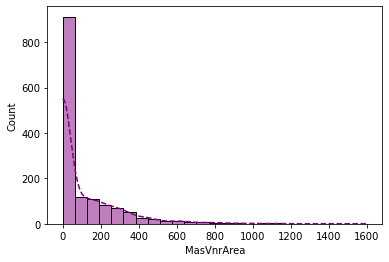

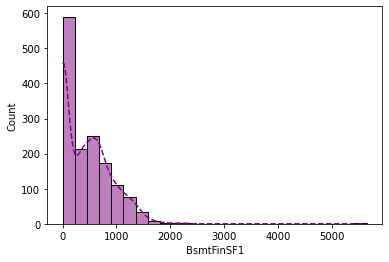

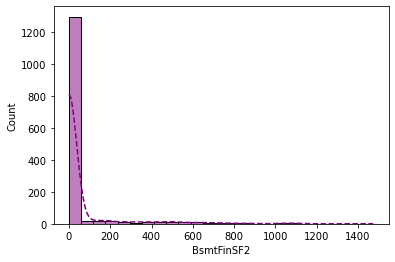

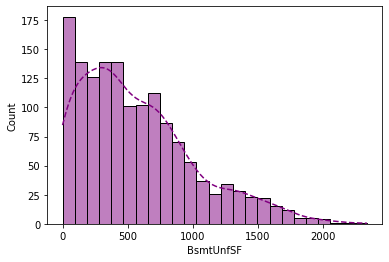

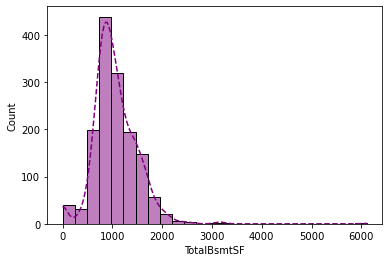

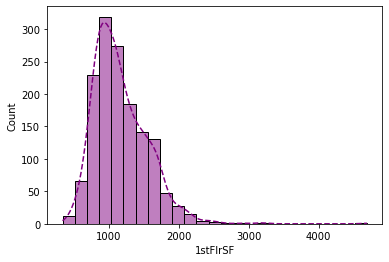

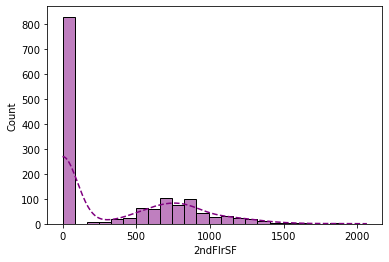

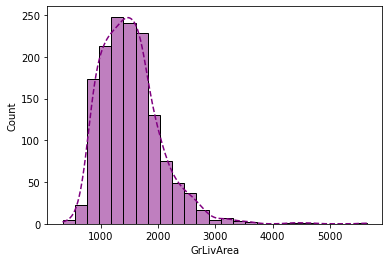

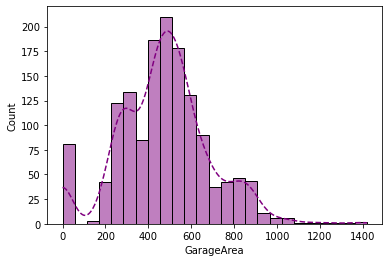

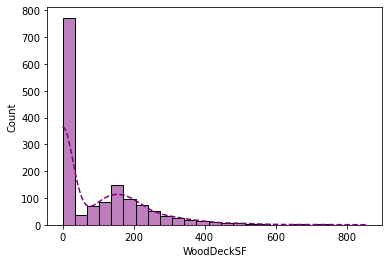

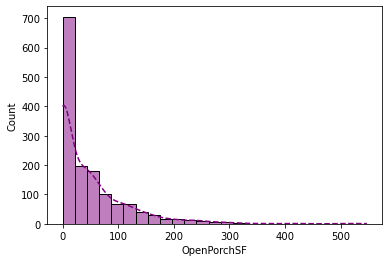

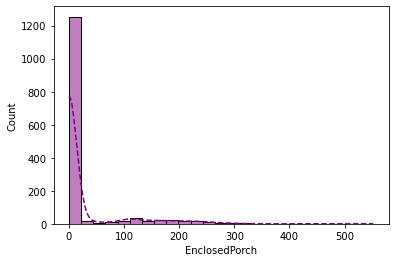

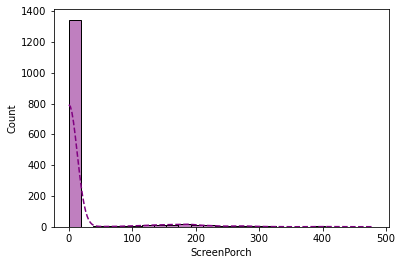

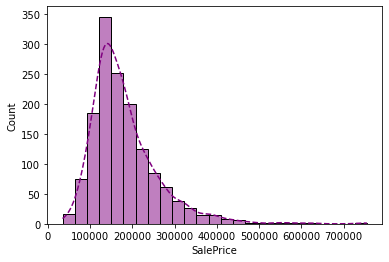

In [15]:
for feature in continuous:
    df_copy=df.copy()
    sns.histplot(df_copy[feature],bins=25,kde=True,color='purple',line_kws={'linestyle':'--'})
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

- Above histogram is the evidence that the data of all the continuous features are skewed and not follow the gaussian distribution.

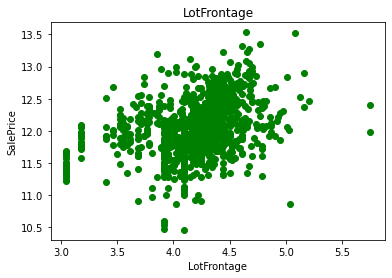

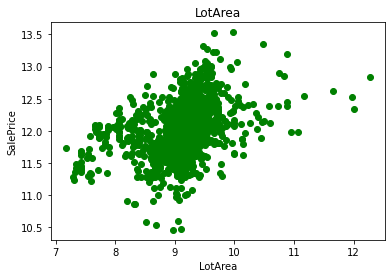

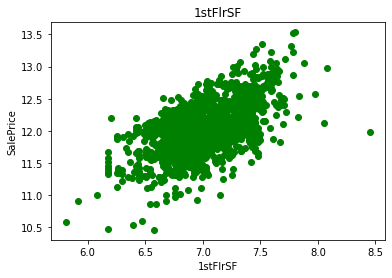

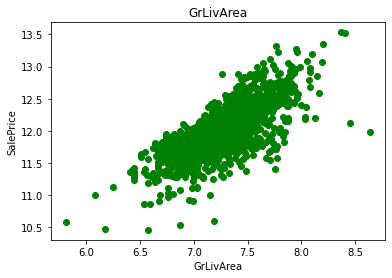

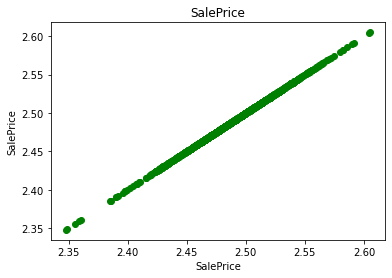

In [16]:
# Using Logarithmic transformation
for feature in continuous:
    df_copy=df.copy()
    if 0 in df_copy[feature].unique():
        pass
    else:
        df_copy[feature]=np.log(df_copy[feature])
        df_copy['SalePrice']=np.log(df_copy['SalePrice'])
        plt.scatter(df_copy[feature],df_copy['SalePrice'],color='g')
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.title(feature)
        plt.show()

#### Outliers

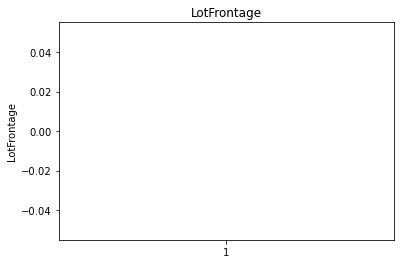

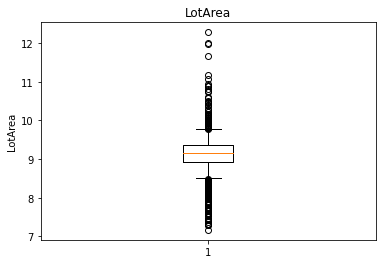

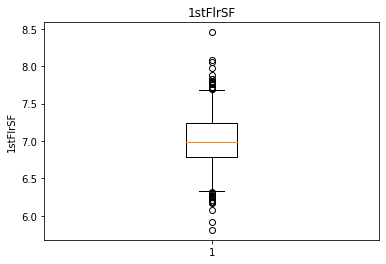

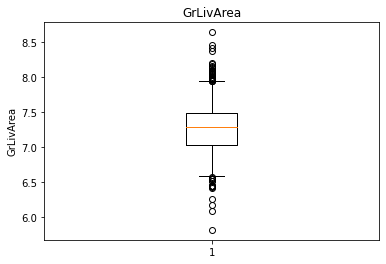

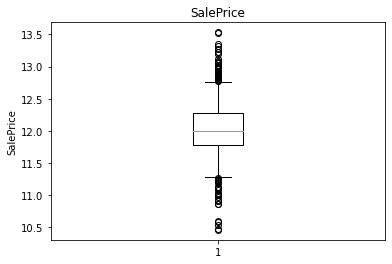

In [17]:

for feature in continuous:
    df_copy=df.copy()
    if 0 in df_copy[feature].unique():
        pass
    else:
        df_copy[feature]=np.log(df_copy[feature])
        plt.boxplot(df_copy[feature],whis=True)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

- Since the data are skewed and not normally distributed it is obvious that the continuos feature would contains outliers. Outliers are those values which is completely different from the remaining set of data.

#### Categorical Variables

In [18]:
categorical = [features for features in df.columns if df[features].dtypes=='object']
print("# of categorical features:", len(categorical))

# of categorical features: 43


In [19]:
df[categorical].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [20]:
for features in categorical:
    print("Feature {} has {} number of categories.".format(features,len(df[features].unique())))

Feature MSZoning has 5 number of categories.
Feature Street has 2 number of categories.
Feature Alley has 3 number of categories.
Feature LotShape has 4 number of categories.
Feature LandContour has 4 number of categories.
Feature Utilities has 2 number of categories.
Feature LotConfig has 5 number of categories.
Feature LandSlope has 3 number of categories.
Feature Neighborhood has 25 number of categories.
Feature Condition1 has 9 number of categories.
Feature Condition2 has 8 number of categories.
Feature BldgType has 5 number of categories.
Feature HouseStyle has 8 number of categories.
Feature RoofStyle has 6 number of categories.
Feature RoofMatl has 8 number of categories.
Feature Exterior1st has 15 number of categories.
Feature Exterior2nd has 16 number of categories.
Feature MasVnrType has 5 number of categories.
Feature ExterQual has 4 number of categories.
Feature ExterCond has 5 number of categories.
Feature Foundation has 6 number of categories.
Feature BsmtQual has 5 numbe

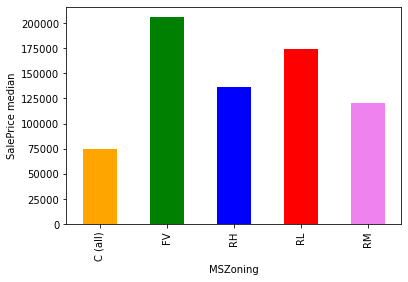

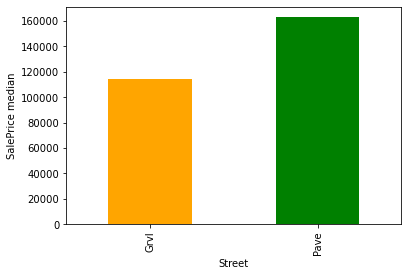

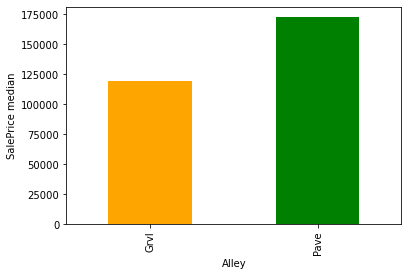

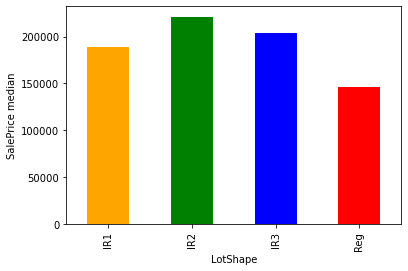

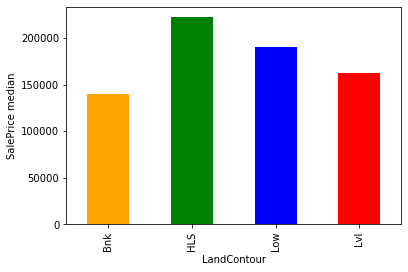

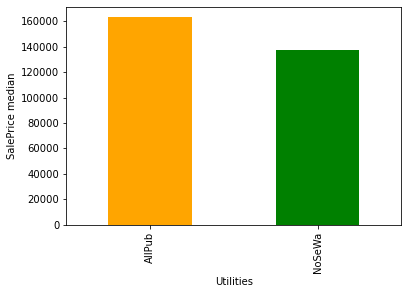

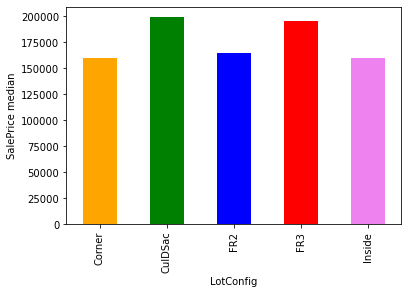

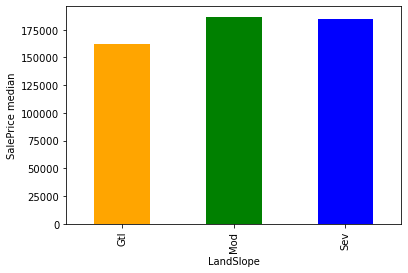

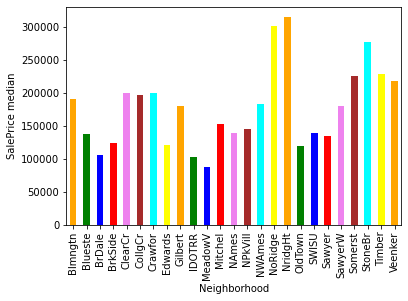

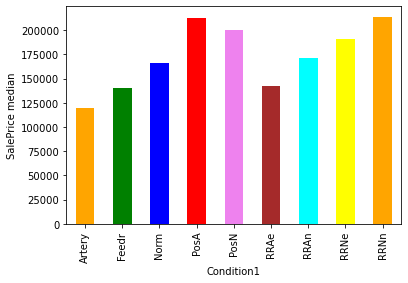

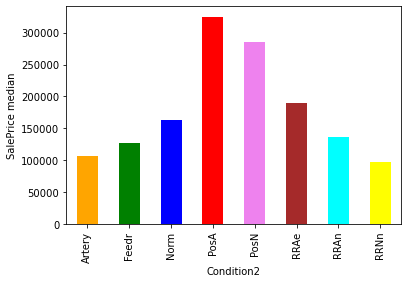

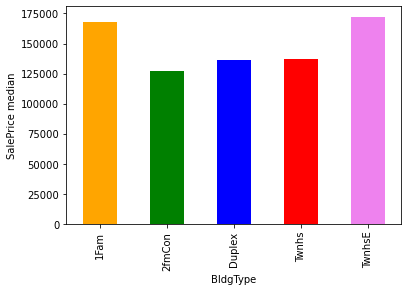

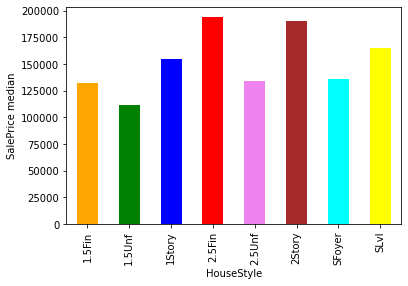

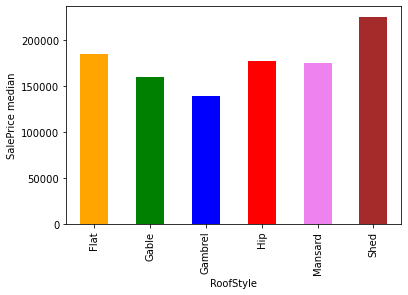

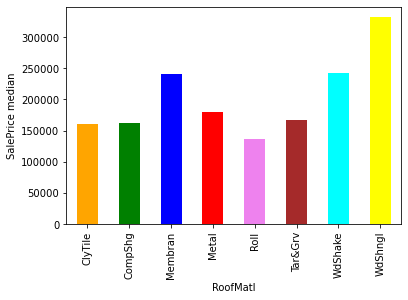

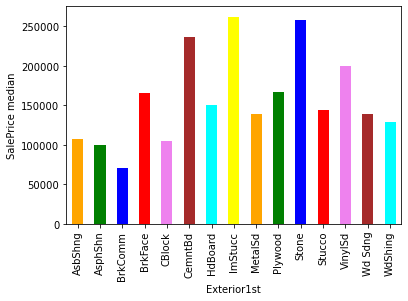

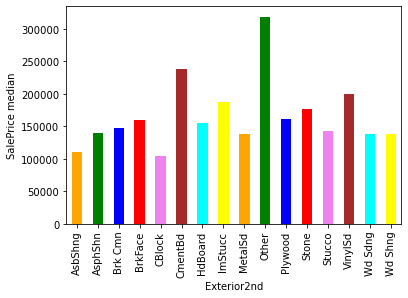

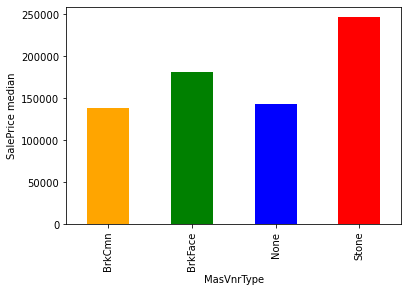

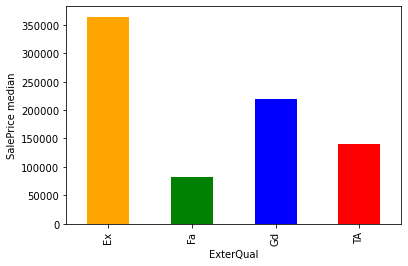

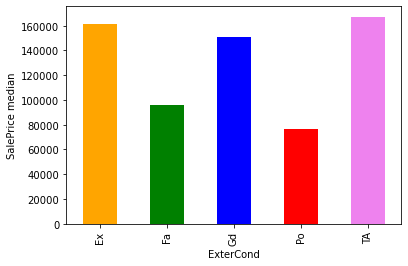

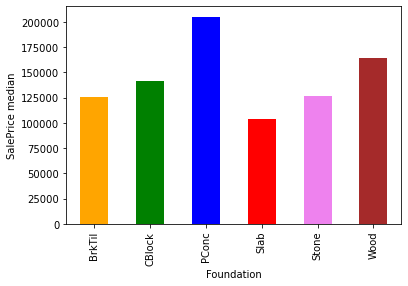

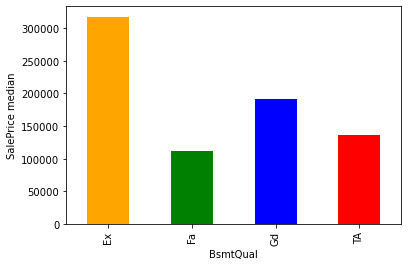

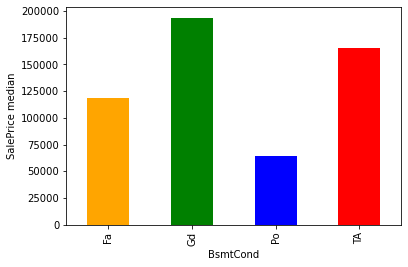

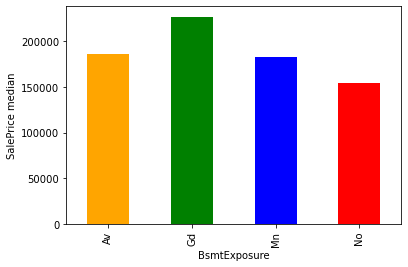

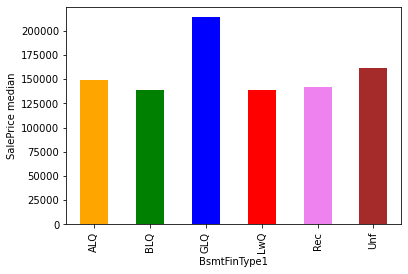

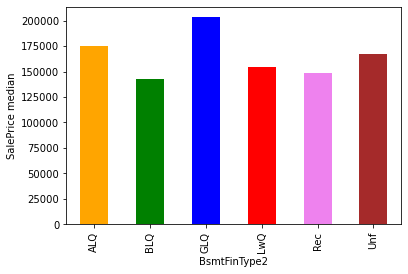

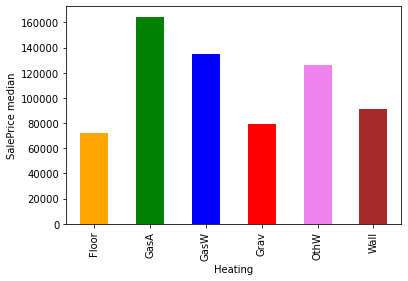

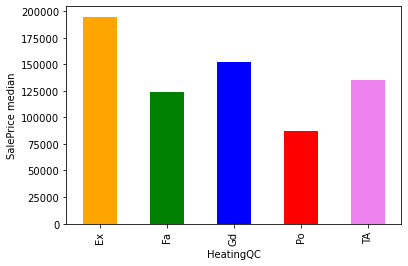

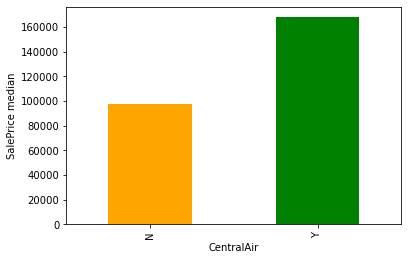

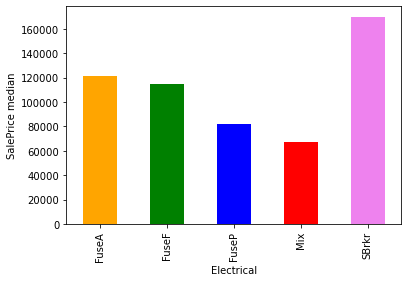

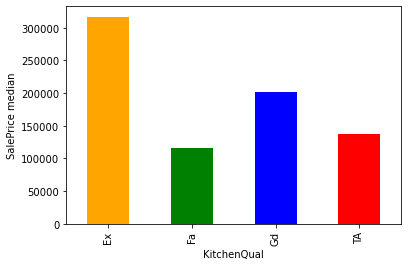

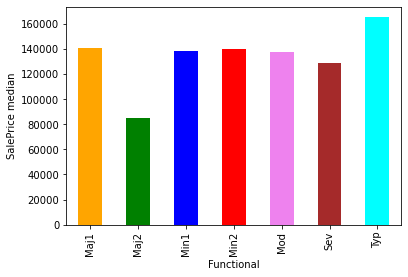

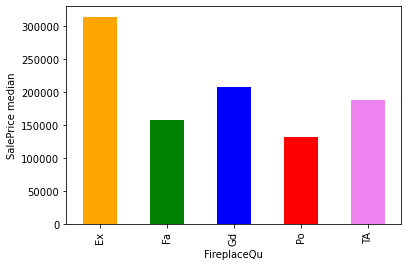

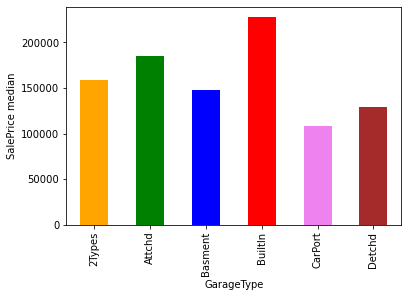

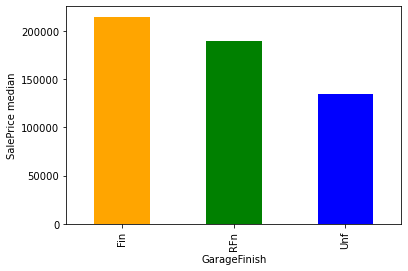

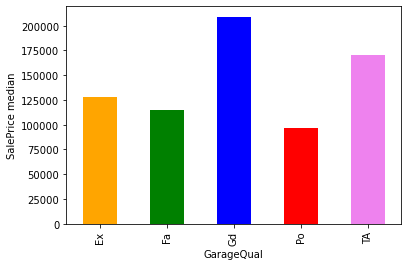

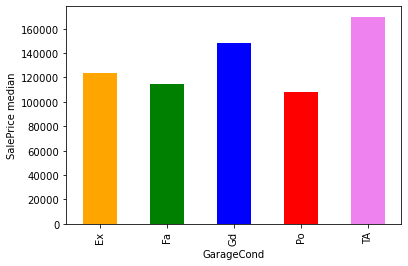

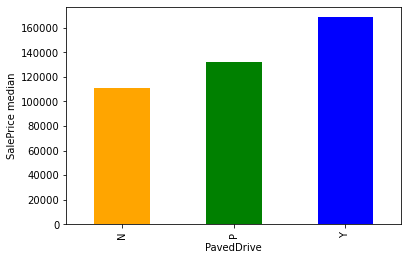

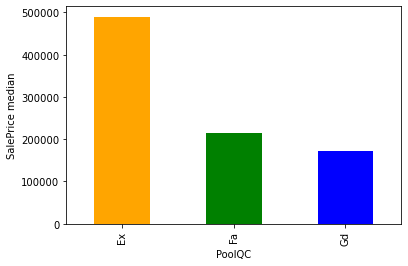

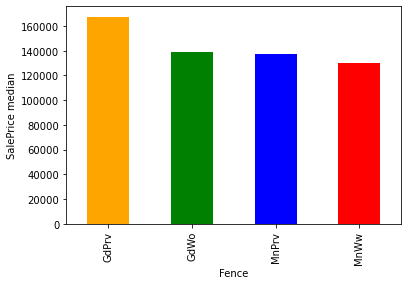

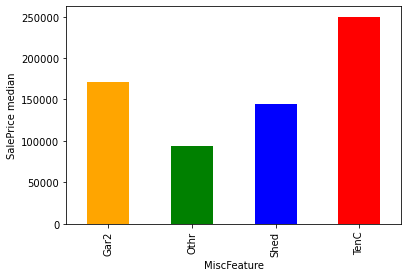

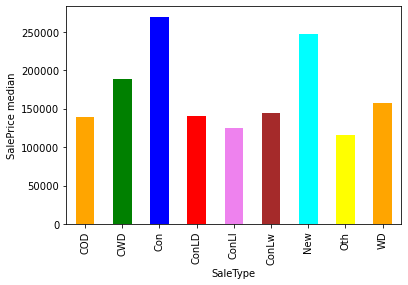

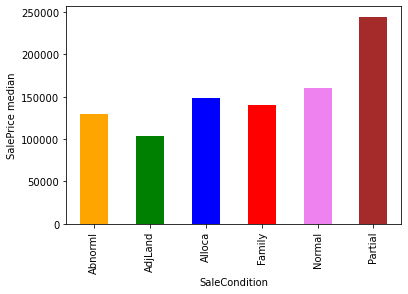

In [21]:
# relationship between categorical features and dependent variable
for features in categorical:
    df_copy=df.copy()
    df_copy.groupby(features)['SalePrice'].median().plot.bar(color=['orange','green','blue','red','violet','brown','cyan','yellow'])
    plt.xlabel(features)
    plt.ylabel('SalePrice median')
    plt.show()

### Feature Engineering

We will be performing all the below steps in Feature Engineering

1. Dealing with Missing values
2. Dealing with Temporal variables
3. Categorical variables: Remove of rare labels
4. Standarise the values of the variables to the same range

#### Missing Values

In [22]:
# Categorical variables
categorical_nan =[features for features in df.columns if df[features].isnull().sum()>1 and df[features].dtypes=='object']
for features in categorical_nan:
    print(features,":",np.round(df[features].isnull().mean()*100,2),"missing values")

Alley : 93.77 missing values
MasVnrType : 0.55 missing values
BsmtQual : 2.53 missing values
BsmtCond : 2.53 missing values
BsmtExposure : 2.6 missing values
BsmtFinType1 : 2.53 missing values
BsmtFinType2 : 2.6 missing values
FireplaceQu : 47.26 missing values
GarageType : 5.55 missing values
GarageFinish : 5.55 missing values
GarageQual : 5.55 missing values
GarageCond : 5.55 missing values
PoolQC : 99.52 missing values
Fence : 80.75 missing values
MiscFeature : 96.3 missing values


In [23]:
# Replacing missing value with "Missing" in categorical variable
def replace_nan_categorical(df,categorical_nan):
    data=df.copy()
    data[categorical_nan]=data[categorical_nan].fillna('Missing')
    return data

df = replace_nan_categorical(df,categorical_nan)
df[categorical_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [24]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000


In [25]:
# Numerical Variables
numerical_nan=[features for features in df.columns if df[features].isnull().sum()>1 and df[features].dtypes!='O']

for features in numerical_nan:
    print(features,":",np.round(df[features].isnull().mean()*100,2),'missing values')

LotFrontage : 17.74 missing values
MasVnrArea : 0.55 missing values
GarageYrBlt : 5.55 missing values


In [26]:
# Replacing missing values in numerical variables
for features in numerical_nan:
    #replace the missing value according--
    # for normal distribution data use mean and for skewed data or data containing outliers use median
    median_value = df[features].median()
    # creating new feature to flag missing values
    df[features+'nan']=np.where(df[features].isnull(),1,0)
    df[features].fillna(median_value,inplace=True)
    
df[numerical_nan].isnull().sum()    

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [27]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000,0,0,0


In [28]:
# Temporal variable
temporal = ['YearBuilt','YearRemodAdd','GarageYrBlt']
for features in temporal:
    df[features]=df['YrSold']-df[features]
    
df[temporal].head()    

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0


### Numerical Variables

 Since numerical variables are skewed we will perform log normal distribution

In [29]:
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

for feature in num_features:
    df[feature]=np.log(df[feature])
    
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,12.429216,0,0,0


## Handling Rare Categorical Feature

We will remove categorical variables that are present less than 1% of the observations

In [30]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']

for feature in categorical_features:
    temp=df.groupby(feature)['SalePrice'].count()/len(df)
    temp_df=temp[temp>0.01].index
    df[feature]=np.where(df[feature].isin(temp_df),df[feature],'Rare_var')
    
df.head()
    

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,12.247694,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Rare_var,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109011,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,12.317167,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,11.849398,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,12.429216,0,0,0


In [31]:
# Label Encoding for categorical variable
for feature in categorical_features:
    labels_ordered=df.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df[feature]=df[feature].map(labels_ordered)

In [32]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,3,4.174387,9.041922,1,2,0,1,1,0,0,14,2,1,3,5,7,5,5,5,0,0,10,10,2,196.0,2,3,4,3,3,1,6,706,5,0,150,856,2,4,1,3,6.752270,854,0,7.444249,1,0,2,1,3,1,2,8,4,0,1,4,5.0,2,2,548,2,3,2,0,61,0,0,0,0,0,4,2,0,2,2008,2,3,12.247694,0,0,0
1,2,20,3,4.382027,9.169518,1,2,0,1,1,2,0,11,1,1,3,3,6,8,31,31,0,0,4,3,1,0.0,1,3,2,3,3,4,4,978,5,0,284,1262,2,4,1,3,7.140453,0,0,7.140453,0,1,2,0,3,1,1,6,4,1,3,4,31.0,2,2,460,2,3,2,298,0,0,0,0,0,0,4,2,0,5,2007,2,3,12.109011,0,0,0
2,3,60,3,4.219508,9.328123,1,2,1,1,1,0,0,14,2,1,3,5,7,5,7,6,0,0,10,10,2,162.0,2,3,4,3,3,2,6,486,5,0,434,920,2,4,1,3,6.824374,866,0,7.487734,1,0,2,1,3,1,2,6,4,1,3,4,7.0,2,2,608,2,3,2,0,42,0,0,0,0,0,4,2,0,9,2008,2,3,12.317167,0,0,0
3,4,70,3,4.094345,9.164296,1,2,1,1,1,1,0,16,2,1,3,5,7,5,91,36,0,0,2,4,1,0.0,1,3,1,2,4,1,4,216,5,0,540,756,2,3,1,3,6.867974,756,0,7.448334,1,0,1,0,3,1,2,7,4,1,4,2,8.0,1,3,642,2,3,2,0,35,272,0,0,0,0,4,2,0,2,2006,2,0,11.849398,0,0,0
4,5,60,3,4.430817,9.565214,1,2,1,1,1,2,0,22,2,1,3,5,8,5,8,8,0,0,10,10,2,350.0,2,3,4,3,3,3,6,655,5,0,490,1145,2,4,1,3,7.043160,1053,0,7.695303,1,0,2,1,4,1,2,9,4,1,3,4,8.0,2,3,836,2,3,2,192,84,0,0,0,0,0,4,2,0,12,2008,2,3,12.429216,0,0,0


### Features Scaling

In [33]:
scaling_features =[features for features in df.columns if features not in['Id','SalePrice']]
len(scaling_features)

82

*** Always remember to split the dataset into train and test to avoid data leakage before feature engineering

In [34]:
independent= [features for features in df.columns if features not in ['Id','LotFrontagenan','MasVnrAreanan','GarageYrBltnan','SalePrice']]
X=df[independent]
Y=df['SalePrice']

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,Y,random_state=42,test_size=0.2)

In [36]:
# Normalizating the data since the data is not normally distributed and contains outliers
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [37]:
# Normalize only independent features
X_Train=scaler.fit_transform(X_train)
X_Test=scaler.fit_transform(X_test)

In [38]:
x_train=pd.DataFrame(X_Train,columns=independent)
x_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.000000,0.75,0.445638,0.365182,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.363636,0.4,1.0,0.75,0.6,0.444444,0.625,0.389706,0.885246,0.0,0.0,0.4,0.3,0.25,0.000000,0.333333,0.666667,0.50,0.50,0.75,0.25,0.166667,0.163359,0.833333,0.0,0.167808,0.215057,1.0,0.50,1.0,1.000000,0.518336,0.000000,0.0,0.484528,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.333333,0.250000,1.0,0.000000,0.2,0.8,0.495327,0.666667,0.25,0.207334,0.666667,1.0,1.0,0.291715,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.454545,1.00,0.666667,0.75
1,0.235294,0.75,0.382360,0.351604,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.590909,0.4,1.0,0.75,1.0,0.555556,0.750,0.117647,0.262295,0.0,0.0,1.0,1.0,0.25,0.000000,0.666667,1.000000,1.00,0.75,0.75,0.25,0.833333,0.000000,0.833333,0.0,0.342038,0.130769,1.0,0.75,1.0,1.000000,0.330077,0.373850,0.0,0.547721,0.000000,0.0,0.666667,0.5,0.375,0.333333,0.333333,0.416667,1.0,0.333333,0.6,0.8,0.149533,0.666667,0.50,0.267983,0.666667,1.0,1.0,0.000000,0.073126,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.363636,0.75,0.666667,0.75
2,0.058824,0.75,0.429425,0.373775,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.227273,0.2,1.0,0.75,0.6,0.444444,0.750,0.720588,0.967213,0.0,0.0,0.4,0.1,0.25,0.000000,0.333333,1.000000,0.50,0.25,0.75,0.25,0.833333,0.000000,0.833333,0.0,0.340753,0.130278,1.0,0.75,1.0,0.666667,0.328654,0.000000,0.0,0.307217,0.000000,0.0,0.333333,0.0,0.250,0.333333,0.333333,0.166667,1.0,0.000000,0.2,0.0,0.261682,0.000000,0.00,0.000000,0.000000,0.0,0.5,0.382730,0.000000,0.297101,0.0,0.0,0.0,0.0,0.5,1.0,0.0,0.363636,0.50,0.666667,0.75
3,0.176471,0.75,0.388581,0.335012,1.0,1.0,0.000000,0.333333,1.0,0.25,0.0,0.318182,0.2,1.0,0.75,0.2,0.444444,0.750,0.514706,0.950820,0.0,0.0,0.2,0.1,0.50,0.182874,0.333333,1.000000,0.25,0.75,0.75,0.25,0.666667,0.100815,0.833333,0.0,0.069349,0.119640,1.0,1.00,1.0,1.000000,0.407736,0.381114,0.0,0.589512,0.333333,0.0,0.333333,0.5,0.375,0.333333,0.666667,0.416667,1.0,0.666667,0.6,0.4,0.635514,0.333333,0.25,0.169252,0.666667,1.0,1.0,0.000000,0.000000,0.478261,0.0,0.0,0.0,0.0,0.5,1.0,0.0,0.454545,0.25,0.666667,0.75
4,0.176471,0.75,0.321097,0.263645,1.0,0.5,0.000000,0.333333,1.0,0.00,0.0,0.318182,0.4,1.0,0.75,0.2,0.444444,0.625,0.632353,1.000000,0.0,0.0,0.8,0.1,0.25,0.000000,0.333333,1.000000,0.25,0.50,0.75,0.25,0.500000,0.038625,0.833333,0.0,0.345890,0.167921,1.0,0.50,1.0,1.000000,0.424709,0.322034,0.0,0.573760,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.8,0.4,0.803738,0.333333,0.25,0.217207,0.666667,1.0,1.0,0.000000,0.000000,0.438406,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.363636,1.00,0.666667,0.75


In [39]:
x_test=pd.DataFrame(X_Test,columns=independent)
x_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.000000,0.75,0.569380,0.448319,1.0,1.0,0.000000,0.333333,0.0,0.00,0.0,0.272727,0.4,1.0,0.75,0.6,0.500,0.857143,0.338583,0.050000,1.0,0.0,0.6,0.5,0.25,0.00000,0.333333,1.000000,0.5,0.5,0.75,0.25,1.000000,0.303016,0.833333,0.0,0.193928,0.330318,1.0,0.333333,1.0,1.000000,0.444806,0.000000,0.0,0.364139,0.0,0.5,0.333333,0.0,0.500000,0.0,0.333333,0.333333,1.0,0.000000,0.2,0.8,0.488636,0.666667,0.25,0.189928,0.666667,1.0,1.0,0.412017,0.000000,0.000000,0.0,0.0,0.0,0.0,0.5,1.0,0.0,0.090909,0.00,0.666667,0.75
1,0.235294,0.75,0.728504,0.545763,1.0,1.0,0.333333,0.333333,0.0,0.25,0.0,1.000000,0.4,1.0,0.75,1.0,0.750,0.428571,0.125984,0.250000,0.0,0.0,0.6,0.5,0.50,0.22625,0.666667,1.000000,1.0,1.0,0.75,0.75,1.000000,0.471664,0.833333,0.0,0.211068,0.456332,1.0,1.000000,1.0,1.000000,0.633727,0.599359,0.0,0.773077,0.5,0.0,0.666667,0.5,0.500000,0.0,0.666667,0.666667,1.0,0.666667,0.6,0.8,0.181818,0.666667,0.50,0.512230,0.666667,1.0,1.0,0.399142,0.116788,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.272727,1.00,0.666667,0.75
2,0.058824,0.25,0.463852,0.464608,1.0,0.0,0.000000,0.333333,0.0,0.00,0.0,0.181818,0.0,1.0,0.75,0.6,0.375,0.571429,0.653543,1.000000,0.0,0.0,0.3,0.4,0.25,0.00000,0.333333,1.000000,0.5,0.5,0.75,0.25,0.833333,0.000000,0.833333,0.0,0.493634,0.314410,1.0,0.666667,1.0,0.666667,0.423575,0.000000,0.0,0.346758,0.0,0.0,0.333333,0.0,0.333333,0.0,0.333333,0.222222,1.0,0.333333,0.8,0.4,0.943182,0.333333,0.50,0.258993,0.666667,1.0,1.0,0.000000,0.000000,0.408805,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.181818,1.00,0.666667,0.75
3,0.176471,0.25,0.410256,0.313480,1.0,1.0,0.000000,0.333333,0.0,0.25,0.0,0.136364,0.2,1.0,0.75,0.2,0.500,0.714286,0.464567,0.933333,0.0,0.0,0.9,0.9,0.25,0.00000,0.333333,0.666667,0.5,0.5,0.75,0.25,0.666667,0.182358,0.833333,0.0,0.296278,0.313163,1.0,1.000000,1.0,1.000000,0.410437,0.352564,0.0,0.566040,0.0,0.0,0.666667,0.0,0.500000,0.0,0.333333,0.444444,1.0,0.666667,0.8,0.4,0.636364,0.333333,0.50,0.302158,0.666667,1.0,1.0,0.000000,0.087591,0.113208,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.818182,0.00,0.666667,0.75
4,0.000000,0.75,0.682947,0.558990,1.0,1.0,0.333333,1.000000,0.0,0.00,0.0,0.863636,0.4,1.0,0.75,0.6,0.875,0.428571,0.015748,0.016667,1.0,0.0,1.0,1.0,1.00,0.04375,0.666667,1.000000,1.0,1.0,0.75,1.00,1.000000,0.467093,0.833333,0.0,0.292850,0.505303,1.0,1.000000,1.0,1.000000,0.676531,0.000000,0.0,0.553839,0.5,0.0,0.666667,0.0,0.333333,0.0,1.000000,0.333333,1.0,0.333333,1.0,0.8,0.011364,1.000000,0.75,0.656115,0.666667,1.0,1.0,0.489270,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.727273,0.75,0.666667,0.75


### Apply Feature Selection
First, I have specified the Lasso Regression model, and I have selected a suitable alpha (equivalent of penalty).
The bigger the alpha the less features that will be selected.

Then I use the selectFromModel object from sklearn, which will select the features were coefficients are non-zero.



In [42]:
## Feature slection
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
feature_sel = SelectFromModel(Lasso(alpha=0.001, random_state=0)) # remember to set the seed, the random state in this function
feature_sel.fit(x_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.001, random_state=0))

In [43]:
# let's print the number of total selected features

# this is how we can make a list of the selected features
selected_feature = x_train.columns[(feature_sel.get_support())]

# let's print some stats
print('total features: {}'.format((x_train.shape[1])))
print('selected features: {}'.format(len(selected_feature)))
print('features with coefficients shrank to zero: {}'.format(np.sum(feature_sel.estimator_.coef_ == 0)))

total features: 79
selected features: 42
features with coefficients shrank to zero: 37


### Model Building

In [44]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()

In [45]:
alpha= np.logspace(-4,4,9)
param={'alpha':alpha}
search=GridSearchCV(lasso,param,cv=5)
search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04])})

In [46]:
print("Best alpha:",search.best_params_['alpha'])
print("Best Score:",search.best_score_)

Best alpha: 0.001
Best Score: 0.8847186169151271


In [47]:
x_train_final=x_train[selected_feature]
x_test_final=x_test[selected_feature]

In [48]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train_final,y_train)

LinearRegression()

In [49]:
y_pred=reg.predict(x_test_final)

In [50]:
# R-squred
from sklearn.metrics import r2_score,mean_squared_error
print("R-Squared:",np.round(r2_score(y_test,y_pred),4))

R-Squared: 0.899


In [51]:
np.round(reg.score(x_test_final,y_test),4)

0.899

In [52]:
# Testing error
print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

MSE: 0.018854671458829637
RMSE: 0.1373123135732176


In [53]:
# Training error
print("MSE:",mean_squared_error(y_train,reg.predict(x_train_final)))

MSE: 0.014658764083608727


- The model accuracy is approx 90% with low bias and low variance. Hence, we can say that the model is now generalized.